<a href="https://colab.research.google.com/github/sensiboi/Edutech-Data-Analysis/blob/main/Model_Building_Edtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Builiding and Comparison**

Import Libraries

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Load Dataset

In [14]:
df= pd.read_csv('edtech.csv')

Data Pre-processing

In [15]:
if 'ratings' in df.columns:
    df = df.drop('ratings', axis=1)

In [16]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [23]:
df['score_category'] = pd.cut(df['score'], bins=[0, 2.5, 4, 5], labels=['Low', 'Medium', 'High'])

In [37]:
df.dropna(subset=['score_category'], inplace=True)
X = df.drop(['score', 'score_category'], axis=1)
y = df['score_category']

Spliting the dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize the model

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [41]:
results = []

Model Building

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

Confusion Matrix

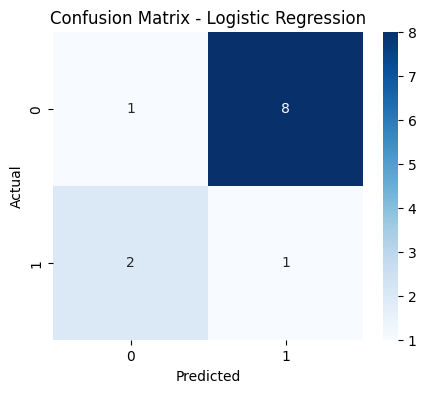

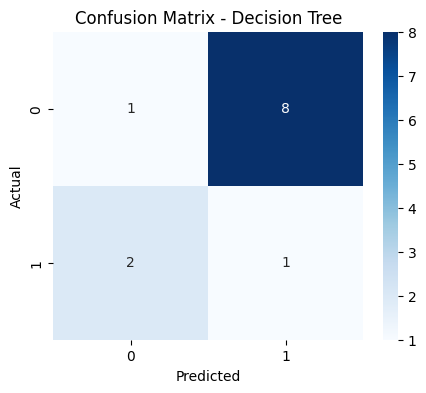

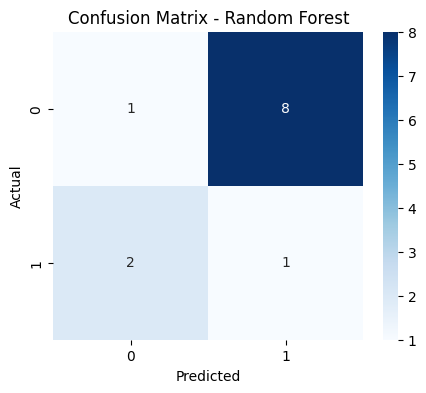

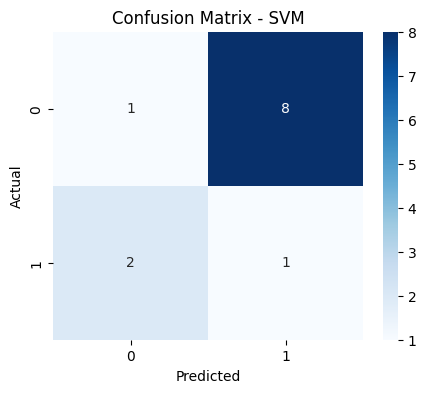

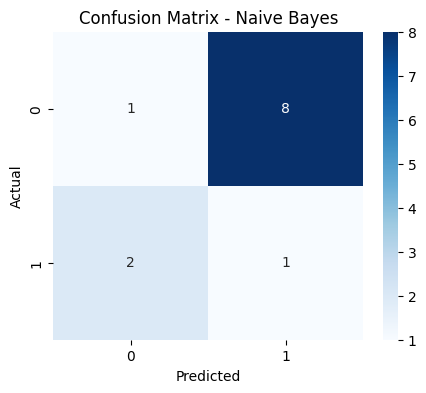

In [43]:
for name, model in models.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Comparison

In [44]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)


Model Comparison Table:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.833333   0.863636  0.833333  0.800000
1        Decision Tree  0.666667   0.739583  0.666667  0.700980
2        Random Forest  0.750000   0.725000  0.750000  0.731579
3                  SVM  0.750000   0.562500  0.750000  0.642857
4          Naive Bayes  0.166667   0.277778  0.166667  0.166667


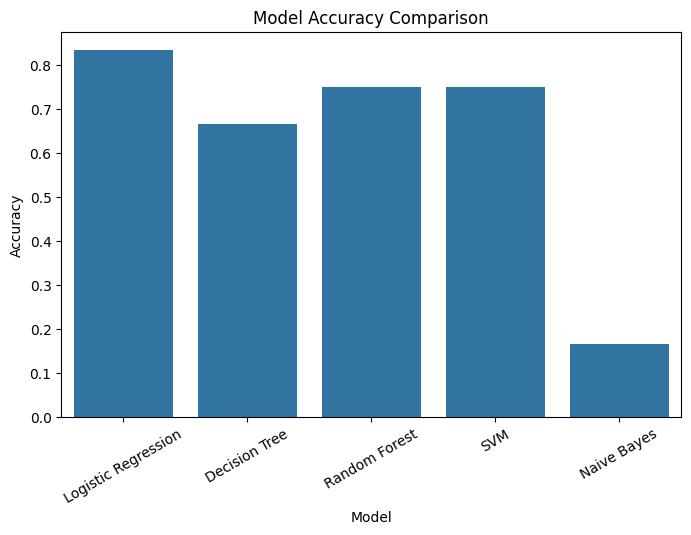

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()